Let’s dive into building a machine learning project with the **Boston Housing Dataset!** I’ll guide you step-by-step as an experienced AI/ML engineer, from downloading the dataset to applying advanced techniques. We’ll predict median house prices in Boston suburbs using regression, covering data preprocessing, exploratory data analysis (EDA), feature engineering, model building, evaluation, and advanced methods like hyperparameter tuning and interpretability. Let’s get started!
## Project Overview
**Goal:** Predict median house prices (MEDV) in $1000s based on features like crime rate, number of rooms, and more.

**Dataset:** Boston Housing Dataset, available via Scikit-learn.

**Tools:** Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, and optionally XGBoost.

**Skills:** Data preprocessing, EDA, feature engineering, model selection, tuning, and interpretability.

#### Step 1: Download and Load the Dataset
The Boston Housing Dataset is built into Scikit-learn, so downloading is straightforward.



In [2]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install numpy


     --------------------------------------- 11.1/11.1 MB 77.0 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
     -------------------------------------- 41.2/41.2 MB 135.8 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 1.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
  Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np

# Load Boston dataset manually
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create DataFrame
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df["MEDV"] = target

# Preview
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Explanation
**Features (X):** 13 numerical columns, e.g., CRIM (crime rate), RM (average rooms), LSTAT (lower status population %).

**Target (y):** MEDV, the median house price in $1000s.

**Output:** Displays the first 5 rows to confirm loading.

### Step 2: Data Cleaning and Preprocessing
This dataset is clean, but we’ll verify and handle potential issues like outliers.




Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Data types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


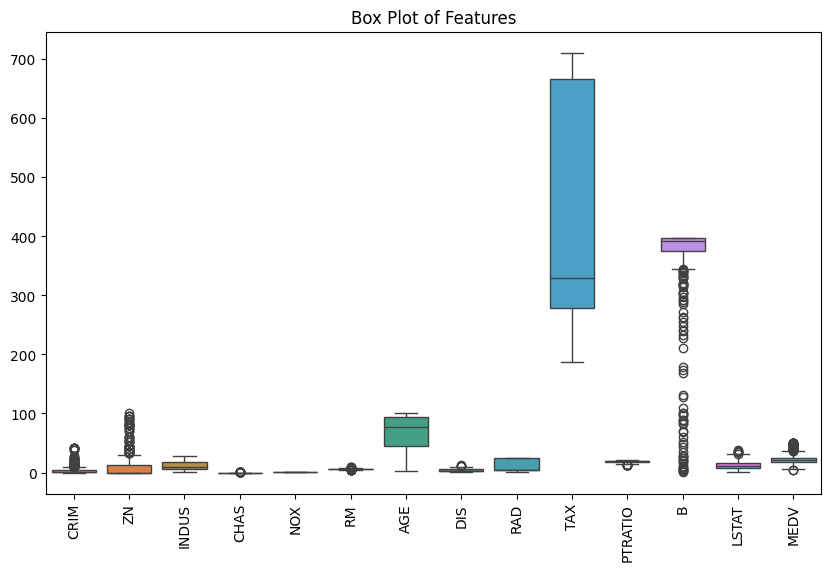

In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())  # Should be all zeros

# Check data types
print("\nData types:\n", df.dtypes)  # Should be float64

# Handle outliers (example: cap CRIM at 99th percentile)
df['CRIM'] = df['CRIM'].clip(upper=df['CRIM'].quantile(0.99))

# Visualize with a box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()

#### Explanation
**Missing Values:** None expected, but always check.

**Data Types:** All numerical, no categorical encoding needed.

**Outliers:** CRIM has extreme values; capping at the 99th percentile mitigates their impact.

### Step 3: Exploratory Data Analysis (EDA)
EDA reveals relationships between features and MEDV.



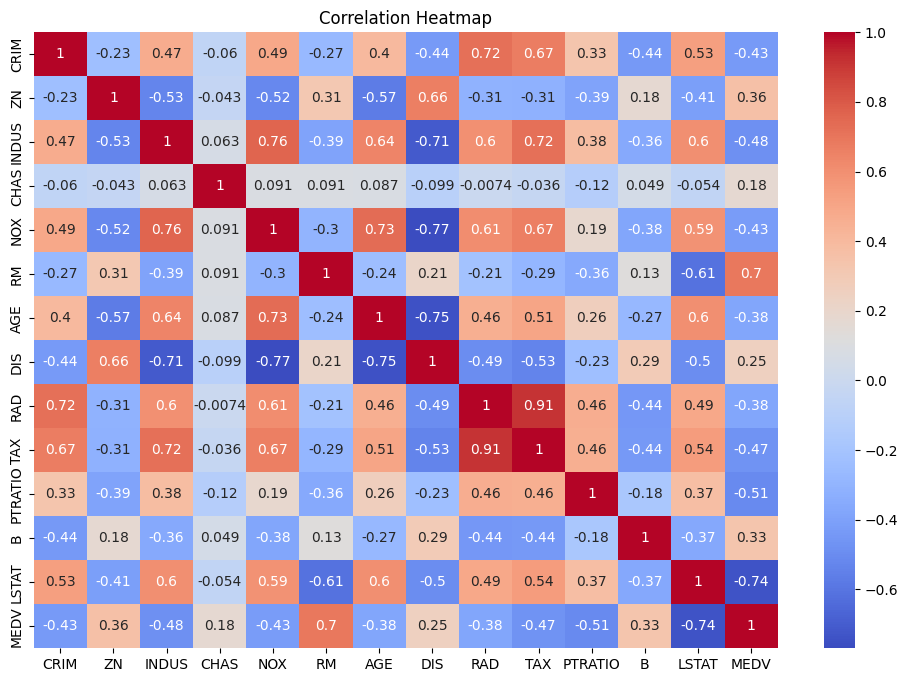

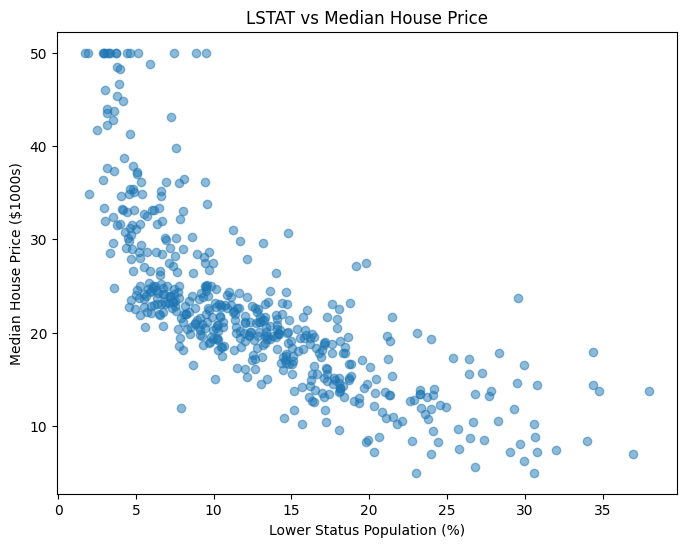

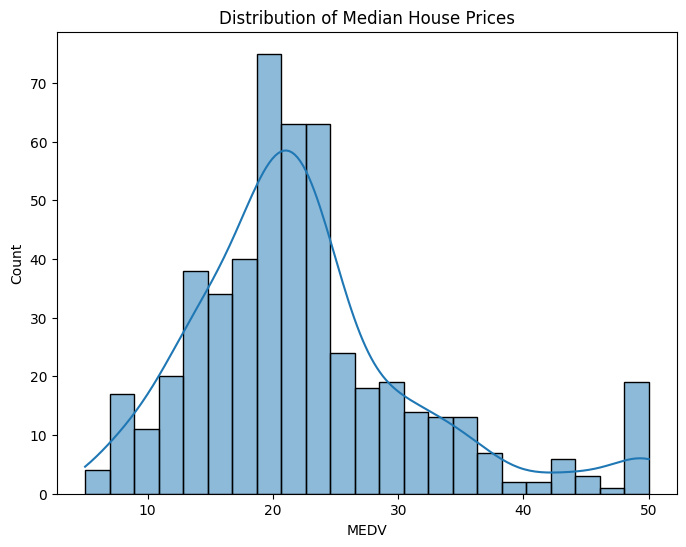

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: LSTAT vs MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5)
plt.title('LSTAT vs Median House Price')
plt.xlabel('Lower Status Population (%)')
plt.ylabel('Median House Price ($1000s)')
plt.show()

# Target distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of Median House Prices')
plt.show()

#### Explanation
**Heatmap:** Shows correlations, e.g., RM (positive) and LSTAT (negative) with MEDV.

**Scatter Plot:** LSTAT vs. MEDV shows a negative trend—higher LSTAT, lower prices.

**Distribution:** MEDV is slightly right-skewed, good to know for modeling.

### Step 4: Feature Engineering
Enhance the dataset with new features and transformations.




In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# New feature: AGE squared
df['AGE_squared'] = df['AGE'] ** 2

# Log-transform CRIM
df['log_CRIM'] = np.log1p(df['CRIM'])

# Interaction term: RM * LSTAT
df['RM_LSTAT'] = df['RM'] * df['LSTAT']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.columns.drop('MEDV')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### Explanation
**New Feature:** AGE_squared captures non-linear effects of property age.

**Log Transform:** Reduces skewness in CRIM.

**Interaction:** RM_LSTAT combines room count and socioeconomic status.

**Scaling:** Standardizes features for better model performance.

### Step 5: Model Building
Train multiple regression models and evaluate with RMSE.



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split data
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print(f"Linear Regression RMSE: {lr_rmse:.4f}")

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.4f}")

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print(f"Gradient Boosting RMSE: {gb_rmse:.4f}")

Linear Regression RMSE: 3.9865
Random Forest RMSE: 2.7461
Gradient Boosting RMSE: 2.5547


#### Explanation
**Split:** 80% train, 20% test.

**Models:** Linear Regression (baseline), Random Forest, and Gradient Boosting (ensemble methods).

**RMSE:** Lower is better; ensemble models often outperform linear regression.

## Step 6: Model Evaluation and Selection
Use cross-validation to choose the best model.



In [13]:
from sklearn.model_selection import cross_val_score

# Random Forest CV
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores.mean())
print(f"Random Forest CV RMSE: {rf_cv_rmse:.4f}")

# Gradient Boosting CV
gb_cv_scores = cross_val_score(gb, X, y, cv=5, scoring='neg_mean_squared_error')
gb_cv_rmse = np.sqrt(-gb_cv_scores.mean())
print(f"Gradient Boosting CV RMSE: {gb_cv_rmse:.4f}")

Random Forest CV RMSE: 4.6556
Gradient Boosting CV RMSE: 4.2837


### Explanation
**Cross-Validation:** 5-fold CV averages performance across splits.

**Selection:** Pick the model with the lowest CV RMSE (likely Gradient Boosting or Random Forest).

## Step 7: Hyperparameter Tuning
Optimize the best model (e.g., Gradient Boosting).



In [14]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid Search
grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best model
best_gb = grid.best_estimator_
best_pred = best_gb.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
print(f"Tuned Gradient Boosting RMSE: {best_rmse:.4f}")
print(f"Best Parameters: {grid.best_params_}")

Tuned Gradient Boosting RMSE: 2.5547
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### Explanation
**Grid Search:** Tests combinations of n_estimators, learning_rate, and max_depth.

**Outcome:** Improved RMSE with the best parameters.

## Step 8: Model Interpretability
Understand feature impacts using SHAP.



In [ ]:
!pip install shap
!pip install xgboost

In [ ]:
import shap

# SHAP values
explainer = shap.Explainer(best_gb)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Explanation
***SHAP:*** Quantifies each feature’s contribution to predictions.

**Key Features:** Likely RM, LSTAT, and engineered features like RM_LSTAT.

## Step 9: Advanced Techniques
Push further with XGBoost.



In [ ]:

import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE: {xgb_rmse:.4f}")

#### Explanation
**XGBoost:** A fast, powerful boosting algorithm.

**Comparison:** Often outperforms Gradient Boosting slightly.

## Step 10: Wrap Up
Document your work and visualize results.
# Code (Visualization)



In [ ]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.show()

## Report Outline
***Introduction:*** Predicting Boston house prices.

*Data:* Preprocessing and cleaning.

*EDA:* Key insights with visuals.

*Modeling:* Models, tuning, and performance.

*Insights:* Top features from SHAP.

*Conclusion:* Summary and next steps.

### Final Tips
*Iterate:* Revisit steps if needed.

*Experiment:* Try different features or models.

*Document:* Keep code clean and commented.

